# Polinômios ortogonais e integração

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Parte 1: Produtos internos e Ortogonalização

Vamos generalizar a idéia do algoritmo de Gram-Schmidt para um produto interno qualquer:
Dados
1. Uma família L.I. de vetores $v_i$ (não precisa ser uma base)
2. Um produto interno $Q(\cdot, \cdot)$

queremos determinar um conjunto de vetores $u_i$ que sejam ortonormais com relação a $Q$.

### Questão 1:

Vamos nos limitar a vetores de $R^n$ (porque é o que o seu computador entende fácil com `array`s do `numpy`.

Escreva uma função `GramSchmidt(vs, Q)` que recebe uma lista `vs` de vetores do mesmo tamanho e uma função `Q` que calcula o produto interno, e retorna uma lista `us` de vetores ortonormais tais que o espaço gerado pelos vetores `us[:k]` seja o mesmo que o gerado pelos vetores `vs[:k]`.  Essas duas propriedades caracterizam completamente o algoritmo de Gram-Schmidt (a menos de trocar o sinal de `us`)

Dica: normalize o primeiro vetor e retire a componente dele dos seguintes, e continue por indução.

In [34]:
def normalize(v,Q=None):
    assert(isinstance(v,ndarray))
    if Q is None:
        return v/norm(v)
    assert(callable(Q))
    sqr_norm = Q(v,v)
    return v*sqrt(sqr_norm)/sqr_norm

def proj(u,v,Q):
    assert(len(u) == len(v))
    assert(isinstance(u,ndarray) and isinstance(v,ndarray))
    return Q(u,v)/Q(u,u)*u

def GramSchmidt(vs, Q):
    ''' Gram-Schmidt orthonormalization of the vectors `vs` with inner product Q.'''
    vs = [array(v) for v in vs]
    us = []
    for i,v in enumerate(vs):
        u = v - sum(proj(u_i,v,Q) for u_i in us[:i+1])
        us.append(normalize(u,Q))
    return us

In [35]:
def canonico(u,v):
    ''' Produto interno canônico em R^n '''
    return sum(ui*vi for ui,vi in zip(u,v))

Testes
1. Acertando a base num caso simples
2. Acertando a base num caso mais complicado
3. Testa de fato que os vetores retornados são ortonormais

In [36]:
base1 = eye(3)
us = GramSchmidt([[3,0,0], [2,5,0], [4,3,2]], canonico)
assert(allclose(base1, us, rtol=1e-12, atol=1e-12))

In [37]:
v2 = [-0.49205628,  0.33667009,  0.80282867]
us = GramSchmidt([[3,2,1], [2,5,6], [4,3,2]], canonico)
assert(allclose(us[1], v2))

In [38]:
us = GramSchmidt(rand(6,6), canonico)
produtos = [[canonico(ui,uj) for ui in us] for uj in us]
assert(allclose(eye(6), produtos, rtol=1e-12, atol=1e-12))

Agora, os testes para um produto interno diferente:

In [39]:
def pi_diagonal(d):
    ''' Produto interno com pesos na diagonal em R^n '''
    def pi(u,v):
        return sum(di*ui*vi for di,ui,vi in zip(d,u,v))
    return pi

In [40]:
pesos = [3,2,4]
Q = pi_diagonal(pesos)
base1 = eye(3)/sqrt(pesos)
us = GramSchmidt([[3,0,0], [2,5,0], [4,3,2]], Q)
assert(allclose(base1, us, rtol=1e-12, atol=1e-12))

In [41]:
v2 = [-0.267168  ,  0.17563822,  0.42548978]
us = GramSchmidt([[3,2,1], [2,5,6], [4,3,2]], Q)
assert(allclose(us[1], v2))

In [42]:
Q = pi_diagonal(rand(6))
us = GramSchmidt(rand(6,6), Q)
produtos = [[Q(ui,uj) for ui in us] for uj in us]
assert(allclose(eye(6), produtos, rtol=1e-12, atol=1e-12))

### Questão 2: Álgebra Linear

Seria bom poder usar algum algoritmo "já pronto" para calcular uma base ortonormal.

Uma ideia é a seguinte: a base canônica já é um conjunto L.I., então basta calcular uma base ortonormal a partir desta.
Considere a matriz $P$ que contém os produtos internos entre os vetores $e_i$ e $e_j$ na entrada $P_{i,j}$.
$P$ é uma matriz simétrica, positiva definida; é a "matriz do produto interno" na base canônica.

A fatoração de Cholesky de $P$ dá uma matriz $L$, triangular inferior, tal que $P = L \cdot L^T$.
Considere a inversa $L_\text{inv} = L^{-1}$.

Mostre que:
1. $L_\text{inv}$ também é triangular inferior; e deduza que
2. As linhas de $L_\text{inv}$ são L.I.
3. O produto interno de dois vetores $u$ e $v$ é dado por $\sum u_i P_{i,j} v_j = u^T P v$; e deduza que
4. As linhas de $L_\text{inv}$ são ortogonais com relação ao produto interno definido pela matriz $P$.

A matriz identidade $I$ é o elemento neutro do produto de matrizes, ou seja, $I.A = A.I = A$, os elementos de $I$ são definidos por $I_{ij} = \delta_{ij} = \begin{cases} 1, \text{ se } i = j \\ 0, \text{ se } i \neq j \end{cases}$

O produto interno entre dois vetores $\langle u,v \rangle$ é definido pelas seguintes propriedades:

(1) $\langle u,v \rangle$ = $\langle v,u \rangle$

(2) $\langle u + kx,v \rangle$ = $\langle u,v \rangle$ + $k \langle x,v \rangle$, a primeira propriedade garante que isso vale para os dois termos do produto interno

(3) $\langle u,u \rangle \geq 0$

Além disso: $\langle u,u \rangle = 0 \iff u = 0$

Uma definição que vem com o produto interno é a de perpendicularidade: $\langle u,v \rangle = 0 \iff u \perp v$. Definido dessa forma, o vetor nulo é perpendicular a qualquer vetor, inclusive ao próprio vetor nulo. Por enquanto vai ficar assim mesmo $v \perp v \iff v = 0$

1. Uma forma de encontrar a inversa de uma matriz $L$ é aplicar a Eliminação de Gauss-Jordan que consiste em zerar os elementos acima e abaixo do pivô, se os elementos acima já estão zerados nada vai ser feito nesse sentido.

2. Dada uma matriz $L$ sua inversa $L_{inv} = L^{-1}$ é tal que $L.L_{inv} = L_{inv}.L = I$. Sabendo disso é fácil notar que $L = (L_{inv})^{-1}$ já que $L_{inv}.L = L.L_{inv} = I$. Sabendo que para ser invertível uma matriz tem que ter linhas L.I., então $L_{inv}$ tem que ter linhas L.I.

3. Para vetores $u,v \in V$, onde $V$ é um espaço vetorial com um número finito de dimensões e produto interno:

$\displaystyle u = \sum\limits_i^d u_i e_i$

$\displaystyle v = \sum\limits_j^d v_j e_j$

$\displaystyle \langle u,v \rangle = 
\langle \sum\limits_i^d u_i e_i, \sum\limits_j^d v_j e_j \rangle = 
\sum\limits_i^d u_i \langle e_i, \sum\limits_j^d v_j e_j \rangle = 
\sum\limits_i^d u_i \langle \sum\limits_j^d v_j e_j, e_i \rangle = 
\sum\limits_i^d u_i \sum\limits_j^d v_j \langle e_j, e_i \rangle = 
\sum\limits_i^d \sum\limits_j^d u_i \langle e_i, e_j \rangle v_j = 
\sum\limits_{i,j} u_i P_{i,j} v_j = u^T P v$ $\blacksquare$

4. Sejam $L_{inv}^T e_i, L_{inv}^T e_j$ linhas quaisquer de $L_{inv}$:

$\langle L_{inv}^T e_i, L_{inv}^T e_j \rangle = 
(L_{inv}^T e_i)^T P L_{inv}^T e_j = 
e_i^T (L_{inv}^T)^T P L_{inv} e_j =
e_i^T L_{inv} L L^T L_{inv}^T e_j = 
e_i^T (L_{inv} L) (L_{inv} L)^T e_j = 
e_i^T e_j$

$\displaystyle e_i^T e_j = \sum\limits_{k}e_{i_k} e_{j_k}$ é o produto interno canônico no $\mathbb{R}^n$. Logo $\langle L_{inv}^T e_i, L_{inv}^T e_j \rangle = \langle e_i, e_j \rangle = \delta_{ij}$. Como $\langle u,v \rangle = 0$ apenas se $u \perp v$, concluo que as linhas de $L_inv$ são perpendiculares e, por ser uma matriz invertível, são diferentes do vetor nulo. $\blacksquare$

Agora, escreva um programa que, dado o produto interno pela função $Q$, calcula uma base ortonormal usando `cholesky`.

In [73]:
def vetor_base_canonica(d,k):
    ''' Retorna vetor da base canônica do R^d com 1 na k-ésima entrada '''
    assert(k < d)
    e = [0]*d
    e[k] = 1
    return array(e)

def matriz_prod_interno(d,Q):
    ''' Monta a matriz produto interno com d linhas e d colunas '''
    e = vetor_base_canonica
    return array([ [ Q(e(d,i),e(d,j)) for j in range(d) ] for i in range(d) ])

def base_on(d,Q):
    ''' d = dimensão, Q = produto interno'''
    P = matriz_prod_interno(d,Q)
    L_inv = inv(cholesky(P))
    return [normalize(L_inv[i],Q) for i in range(d)]

In [74]:
# Gerando um produto interno meio aleatório:
A = rand(3,3)
M = dot(A.T, A)
def Q(u,v):
    return sum([ui*M[i,j]*vj for i,ui in enumerate(u) for j,vj in enumerate(v)])

In [75]:
us = base_on(3,Q)
produtos = [[Q(ui,uj) for ui in us] for uj in us]
assert(allclose(produtos, eye(3)))

Comparando com Gram-Schmidt:

In [76]:
%time base_gs = GramSchmidt(eye(3), Q)
%time base_chol = base_on(3,Q)
assert(allclose(base_gs, base_chol))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.19 ms
CPU times: user 3.33 ms, sys: 0 ns, total: 3.33 ms
Wall time: 4.29 ms


In [77]:
# Gerando um produto interno meio aleatório:
dim = 10
A = rand(dim,dim)
M = dot(A.T, A)
def Q(u,v):
    return sum([ui*M[i,j]*vj for i,ui in enumerate(u) for j,vj in enumerate(v)])

%time base_gs = GramSchmidt(eye(dim), Q)
%time base_chol = base_on(dim,Q)
assert(allclose(base_gs, base_chol))

CPU times: user 43.3 ms, sys: 0 ns, total: 43.3 ms
Wall time: 77.7 ms
CPU times: user 153 ms, sys: 0 ns, total: 153 ms
Wall time: 186 ms


É possível que `base_on` seja mais **lenta** do que GramSchmidt.
1. Qual parte desta função você acha que está levando mais tempo?
2. Em que casos você acha que vale a pena usar (algo similar a) `base_on`?

1. A montagem da matriz produto interno $P$. O produto interno pode ter até complexidade quadrática nas dimensões $O(d^2)$, atribuir elementos a uma matriz com $d$ linhas e $d$ colunas tem complexidade $O(d^2)$, ao fazer $O(d^2)$ operações para definir cada elemento da matriz, fico com uma complexidade total $O(d^4)$ para montar a matriz $P$.
2. Já tendo a matriz $P$ de antemão e sendo ela uma matriz fácil de decompor por `cholesky` em $P = L L^T$ e resultando numa matriz $L$ fácil de inverter (triangular inferior é fácil de inverter, por exemplo). Um classe de matrizes que tem todas essas características é a das matrizes diagonais, $L = \sqrt{P}$, $L$ também seria diagonal e uma matriz diagonal pode ser invertida com a troca das $d$ entradas da diagonal por suas inversas.

## Parte 2: Polinômios

Vamos representar polinômios pelo `array` dos seus coeficientes, em ordem crescente.
Ou seja, o polinômio $P(x) = x^3 - 4x + 1$ será dado por `[1, -4, 0, 1]`, ou qualquer outro array que comece assim e continue com zeros (se $P$ estiver num espaço de polinômios com grau maior!).

### Questão 3: Produto interno

Escreva a função `Q_int(u,v)` que calcula o produto interno de dois polinômios $u$ e $v$,
dado pela integral $\int_{-1}^1 u(t)v(t) \, dt$.

Sugestão: escreva primeiro uma função que calcula o produto interno dos polinômios $x^j$, $x^k$, e depois use a linearidade.

In [49]:
def Q_int(u,v):
    I = 0
    for i,u_i in enumerate(u):
        for j,v_j in enumerate(v):
            s = i+j
            I += u_i*v_j*2/(s+1) if s % 2 == 0 else 0
    return I
    '''# YOUR CODE HERE
    raise NotImplementedError()'''

Verifique que o produto interno está certo:

In [50]:
array([[Q_int(vi,vj) for vi in eye(5)] for vj in eye(5)])

array([[ 2.        ,  0.        ,  0.66666667,  0.        ,  0.4       ],
       [ 0.        ,  0.66666667,  0.        ,  0.4       ,  0.        ],
       [ 0.66666667,  0.        ,  0.4       ,  0.        ,  0.28571429],
       [ 0.        ,  0.4       ,  0.        ,  0.28571429,  0.        ],
       [ 0.4       ,  0.        ,  0.28571429,  0.        ,  0.22222222]])

In [51]:
def Horner(coeff):
    """ Horner's rule for polynomial evaluation.
    
    Given coefficients `coeff` = $[a_0, a_1, ... a_n]$,
    returns a function p(x) that calculates the polynomial $\sum a_n x^n$,
    where `x` can be a numpy array (and will be pointwise evaluated)."""
    rcoeff = coeff[::-1]
    def p(x):
        # Init
        acc = 0.0
        for c in rcoeff:
            acc *= x
            acc += c
        return acc
    return p

In [52]:
# Testando que Q_int acerta para 10 pares de polinômios de grau 3
from scipy.integrate import quad
for u,v in zip(rand(10,4),rand(10,4)):
    Pu = Horner(u)
    Pv = Horner(v)
    uv = Q_int(u,v)
    def f(t): return Pu(t)*Pv(t)
    integral = quad(f, -1, 1)[0]
    assert(abs(integral - uv) < 1e-10)

### Questão 4: Polinômios de Legendre

Agora, ortogonalize os polinômios de grau até 5, usando GramSchmidt:

In [53]:
deg = 5
poly_coefs = GramSchmidt(eye(deg+1), Q_int)
poly_coefs

[array([ 0.70710678,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 array([ 0.        ,  1.22474487,  0.        ,  0.        ,  0.        ,  0.        ]),
 array([-0.79056942,  0.        ,  2.37170825,  0.        ,  0.        ,  0.        ]),
 array([ 0.        , -2.80624304,  0.        ,  4.67707173,  0.        ,  0.        ]),
 array([ 0.79549513,  0.        , -7.95495129,  0.        ,  9.2807765 ,  0.        ]),
 array([  0.        ,   4.39726477,   0.        , -20.52056895,
          0.        ,  18.46851205])]

Coeficientes normalizados

In [54]:
[v/v[0] if v[0] != 0 else v/v[1] for v in _]

[array([ 1.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 1., -0., -3., -0., -0., -0.]),
 array([-0.        ,  1.        , -0.        , -1.66666667, -0.        , -0.        ]),
 array([  1.        ,   0.        , -10.        ,   0.        ,
         11.66666667,   0.        ]),
 array([ 0.        ,  1.        ,  0.        , -4.66666667,  0.        ,
         4.2       ])]

Calcule as raízes dos 4 primeiros e verifique que são de fato os nós de Gauss-Legendre.
Use `Horner` para "demonstrar" (ou pelo menos se convencer!) que de fato são as raízes.
Por exemplo:

In [55]:
p1 = Horner(poly_coefs[1])
p1(0)

0.0

O polinômio de coeficientes `poly_coefs[0]` é constante e diferente de zero, portanto não tem raízes.

In [82]:
p={}
for i in [2,3,4]:
    p[i] = Horner(poly_coefs[i])

r={2:[-sqrt(3)/3,sqrt(3)/3],
   3:[0],
   4:[sqrt((3 + sqrt(4.8))/7),-sqrt((3 + sqrt(4.8))/7)]}

s=''
for n,p_n in p.items():
    for raiz in r[n]:
        s += 'p{}({}) = {}'.format(n,raiz,p_n(raiz))
        s +='\n'
    s += '\n'

print(s)

p2(-0.5773502691896257) = -1.1102230246251565e-16
p2(0.5773502691896257) = -1.1102230246251565e-16

p3(0) = 0.0

p4(0.8611363115940526) = -1.1102230246251565e-16
p4(-0.8611363115940526) = -1.1102230246251565e-16




Agora, faça um gráfico com estes 6 polinômios no intervalo $[-1,1]$:

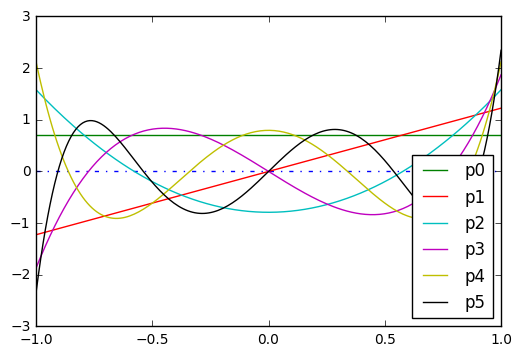

In [84]:
xs = linspace(-1,1,num=200)
plot(xs,zeros_like(xs),'-.')
for i,coefs in enumerate(poly_coefs):
    p_n = Horner(coefs)
    plot(xs,p_n(xs),label='p{}'.format(i))
legend(loc=0);

### Questão 5: Encontrando raízes por Newton

Explique como, dado um vetor `u` com os coeficientes de um polinômio, obter um vetor `ud` com os coeficientes da sua derivada.

Sabendo que a derivada nos polinômios tem as seguintes características:

1. É um operador linear: $\frac{d}{dx} (p + \lambda q)(x) = \frac{d}{dx} p(x) + \lambda\frac{d}{dx} q(x)$, $\lambda$ constante
2. Derivada de monômio: $\frac{d}{dx}(\lambda x^n) = \lambda \frac{d}{dx} x^n = \lambda n x^{n-1}$
3. Derivada de constante: $\frac{d}{dx}\lambda = 0$

Obtendo a derivada de um polinômio:

$p(x) = \sum\limits_{k=0}^{n} a_n x^k$

$\frac{d}{dx}p(x) = 
\frac{d}{dx}\sum\limits_{k=0}^{n} a_k x^k = 
\sum\limits_{k=0}^{n} a_k \frac{d}{dx} x^k = 
\sum\limits_{k=1}^{n} a_k k x^{k-1}$

Posso usar a sequência de termos da soma para tornar o processo um pouco mais algorítmico. Tendo o vetor de coeficientes $u$, basta criar um vetor $u_d$ tal que $ud_{i} = u_{i+1}(i+1)$ e sendo $n$ o grau do polinômio, $ud_n = 0$.

In [97]:
# A função que faz a derivação descrita no enunciado
def deriva_coefs(u):
    return array([u_i*(i+1) for i,u_i in enumerate(u[1:])] + [0])

In [91]:
ncalls = 0
def newton(f,df,x, tol=1e-12):
    ''' Naive Newton's method for polynomials:  don't call too far from roots, will loop. '''
    global ncalls
    ncalls += 1
    step = f(x)/df(x)
    if abs(step) < tol:
        return x - step
    return newton(f,df,x-step)

Use isso para calcular as raízes de $P_5$ com grande precisão:

In [94]:
chutes_iniciais = [-1,-0.5,0,0.5,1]
p5 = Horner(poly_coefs[5])

dp5_coefs = deriva_coefs(poly_coefs[5])
dp5 = Horner(dp5_coefs)
minhas_raizes = [newton(p5,dp5,chute) for chute in chutes_iniciais]

raizes = minhas_raizes

In [95]:
assert(allclose(p5(array(raizes)), 0, rtol=1e-15, atol=1e-15))

### Questão 6: Todas as raízes de todos polinômios

Use
- a ideia de que as raízes de $P_{n+1}$ estão "entre" as raízes de $P_n$
- o método acima se você tem chutes "bons" para as raízes

para fazer um loop e encontrar **todas** as raízes de **todos** os polinômios até grau 20.

In [96]:
poly_coefs_20 = GramSchmidt(eye(21), Q_int)

Escreva aqui uma função que, dados os coeficientes dos polinômios em ordem crescente de grau,
encontra as raízes de cada um deles e retorna numa _lista de arrays_.

In [ ]:
def find_all_roots(poly_coefs):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
todas_raizes = find_all_roots(poly_coefs_20)

for pc, raizes in zip(poly_coefs_20[1:11], todas_raizes[1:11]):
    print(len(raizes))
    p = Horner(pc)
    assert(allclose(p(array(raizes)), 0, rtol=1e-12, atol=1e-12))

In [ ]:
# Newton fica menos preciso com grau mais alto...
for pc, raizes in zip(poly_coefs_20[11:], todas_raizes[11:]):
    print(len(raizes))
    p = Horner(pc)
    assert(allclose(p(array(raizes)), 0, rtol=2e-10, atol=2e-10))